In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df_le = pd.read_csv('anisotropy_radius_left_eye.csv', index_col=0)
df_re = pd.read_csv('anisotropy_radius_right_eye.csv', index_col=0)

In [3]:
df_le.head(10)

,cloud,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,gf08_r_10,gf09_r_10,...,gf01_r_14,gf02_r_14,gf03_r_14,gf04_r_14,gf05_r_14,gf06_r_14,gf07_r_14,gf08_r_14,gf09_r_14,expression
0,bs000_CR_RD_0.pcd,36.062347,1.0,-101.317894,0.920264,0.319981,0.600284,0.053895,0.079736,0.247583,...,64.993530,1.0,-221.316956,0.926614,0.334016,0.592598,0.049559,0.073386,0.219347,RD
1,bs000_PR_SD_0.pcd,40.257923,1.0,-114.833755,0.908905,0.588236,0.320670,0.051454,0.091095,0.033422,...,76.548119,1.0,-268.194946,0.916742,0.613206,0.303537,0.046781,0.083258,0.038102,SD
2,bs000_LFAU_15_0.pcd,36.221920,1.0,-98.865532,0.896532,0.761360,0.135172,0.052567,0.103468,0.053658,...,70.721939,1.0,-241.128448,0.906957,0.711469,0.195487,0.049033,0.093043,0.043466,15
3,bs000_O_GLASSES_0.pcd,40.550774,1.0,-114.919006,0.888258,0.761890,0.126368,0.056283,0.111742,0.056514,...,74.836304,1.0,-255.254868,0.849477,0.717154,0.132324,0.074583,0.150523,0.079030,GLASSES
4,bs000_UFAU_44_0.pcd,43.638218,1.0,-129.124741,0.933253,0.787089,0.146165,0.034753,0.066747,0.039851,...,83.077682,1.0,-297.896545,0.919873,0.751871,0.168002,0.041904,0.080127,0.053701,44
5,bs000_YR_L45_0.pcd,37.758461,1.0,-100.987709,0.779960,0.558342,0.221618,0.110107,0.220040,0.228110,...,87.680824,1.0,-314.702454,0.870411,0.783943,0.086468,0.063427,0.129589,0.212233,L45
6,bs000_LFAU_27_0.pcd,37.996593,1.0,-106.386223,0.915897,0.827366,0.088532,0.042145,0.084102,0.080075,...,73.733932,1.0,-255.230240,0.915648,0.710727,0.204921,0.044881,0.084352,0.062531,27
7,bs000_YR_R10_0.pcd,42.883621,1.0,-125.539795,0.921644,0.687954,0.233691,0.042477,0.078356,0.132496,...,80.913010,1.0,-287.820648,0.917838,0.706245,0.211593,0.043923,0.082162,0.152455,R10
8,bs000_LFAU_22_0.pcd,42.462494,1.0,-123.684982,0.918237,0.779458,0.138780,0.042081,0.081763,0.094292,...,78.427017,1.0,-275.957458,0.911916,0.744398,0.167518,0.045864,0.088084,0.079289,22
9,bs000_YR_L90_0.pcd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L90


In [4]:
df_re.head(10)

,cloud,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,gf08_r_10,gf09_r_10,...,gf01_r_14,gf02_r_14,gf03_r_14,gf04_r_14,gf05_r_14,gf06_r_14,gf07_r_14,gf08_r_14,gf09_r_14,expression
0,bs000_CR_RD_0.pcd,34.481819,1.0,-94.353477,0.929584,0.499189,0.430395,0.042936,0.070416,0.006293,...,70.671356,1.0,-241.851974,0.909993,0.523190,0.386803,0.052846,0.090007,0.008144,RD
1,bs000_PR_SD_0.pcd,36.538013,1.0,-99.908806,0.886836,0.514971,0.371866,0.064988,0.113164,0.081240,...,71.781593,1.0,-245.146194,0.893809,0.547422,0.346387,0.060342,0.106191,0.067358,SD
2,bs000_LFAU_15_0.pcd,44.641808,1.0,-130.688965,0.885949,0.748903,0.137046,0.057689,0.114051,0.182742,...,82.704147,1.0,-294.032166,0.897203,0.695558,0.201645,0.054071,0.102797,0.148485,15
3,bs000_O_GLASSES_0.pcd,45.883480,1.0,-134.346573,0.857039,0.721168,0.135871,0.071228,0.142961,0.084507,...,89.409210,1.0,-321.098755,0.853448,0.585653,0.267795,0.078005,0.146552,0.118217,GLASSES
4,bs000_UFAU_44_0.pcd,41.321648,1.0,-119.913467,0.931032,0.722523,0.208510,0.037070,0.068968,0.041796,...,76.828522,1.0,-269.381531,0.918431,0.696397,0.222034,0.043865,0.081569,0.053241,44
5,bs000_YR_L45_0.pcd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L45
6,bs000_LFAU_27_0.pcd,43.106171,1.0,-126.870995,0.930585,0.757759,0.172827,0.036600,0.069415,0.087721,...,80.228310,1.0,-284.874115,0.919343,0.692662,0.226680,0.043505,0.080657,0.072460,27
7,bs000_YR_R10_0.pcd,40.502640,1.0,-112.945862,0.834299,0.792455,0.041844,0.078019,0.165701,0.027909,...,75.681587,1.0,-261.455444,0.885773,0.717452,0.168320,0.058701,0.114227,0.013719,R10
8,bs000_LFAU_22_0.pcd,34.206631,1.0,-90.659714,0.873212,0.783332,0.089881,0.062245,0.126788,0.055251,...,66.141815,1.0,-220.538467,0.899586,0.712068,0.187517,0.052493,0.100414,0.043100,22
9,bs000_YR_L90_0.pcd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L90


- gf01 Somatório: λ1 + λ2 + λ3
- gf02 Omnivariância: (λ1 * λ2 * λ3) ^ 1/3
- gf03 Autoentropia: Somatório i=1 λi * ln(λi)
- gf04 Anisotropia: (λ1 − λ3) / λ1
- gf05 Planaridade: (λ2 − λ3) / λ1
- gf06 Linearidade: (λ1 − λ2) / λ1
- gf07 Variação de superfı́cie: λ3 / (λ1 + λ2 + λ3)
- gf08 Esfericidade: λ3 / λ1
- gf09 Verticalidade: 1 − |<[0 0 1], e3>|

In [5]:
features = [
    'Somatório', 'Omnivariância', 'Autoentropia',
    'Anisotropia', 'Planaridade', 'Linearidade',
    'Variação de superfície', 'Esfericidade', 'Verticalidade'
]

In [6]:
columns = df_le.columns[1:-1]

In [7]:
def plot_histograms(df, radius=10, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'gf01_r_{radius}', f'gf02_r_{radius}', f'gf03_r_{radius}',
            f'gf04_r_{radius}', f'gf05_r_{radius}', f'gf06_r_{radius}',
            f'gf07_r_{radius}', f'gf08_r_{radius}', f'gf09_r_{radius}']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    df = df[columns]

    i, j = 0, 0 # refactor
    for index, column in enumerate(cols):
        df.hist(ax=axes[i, j], column=[column], bins=10)
        axes[i, j].set_title(features[index])
        j += 1
        if j == 3:
            i += 1
            j = 0

    expression = '' if expression is None else f' - Expressão: {expression}'
    print(f'Histogramas - Raio: {radius} {expression}')
#     fig.suptitle(f'Histogramas - Raio: {radius} {expression}')
    plt.show()

Histogramas - Raio: 10 


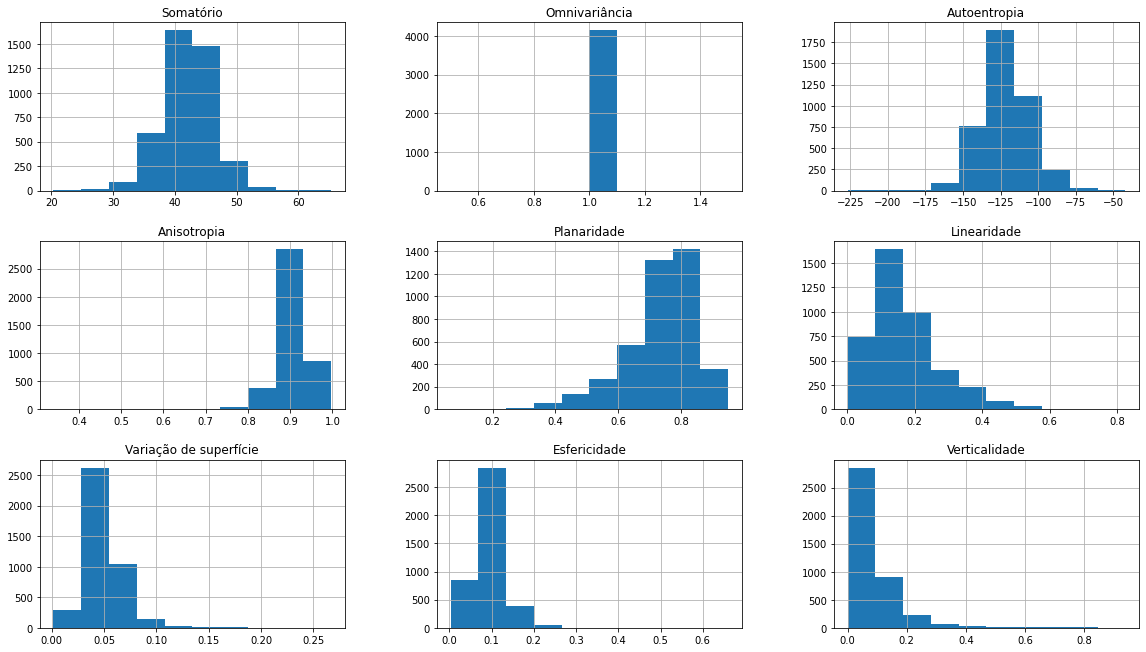

In [8]:
plot_histograms(df_le)

Histogramas - Raio: 10 


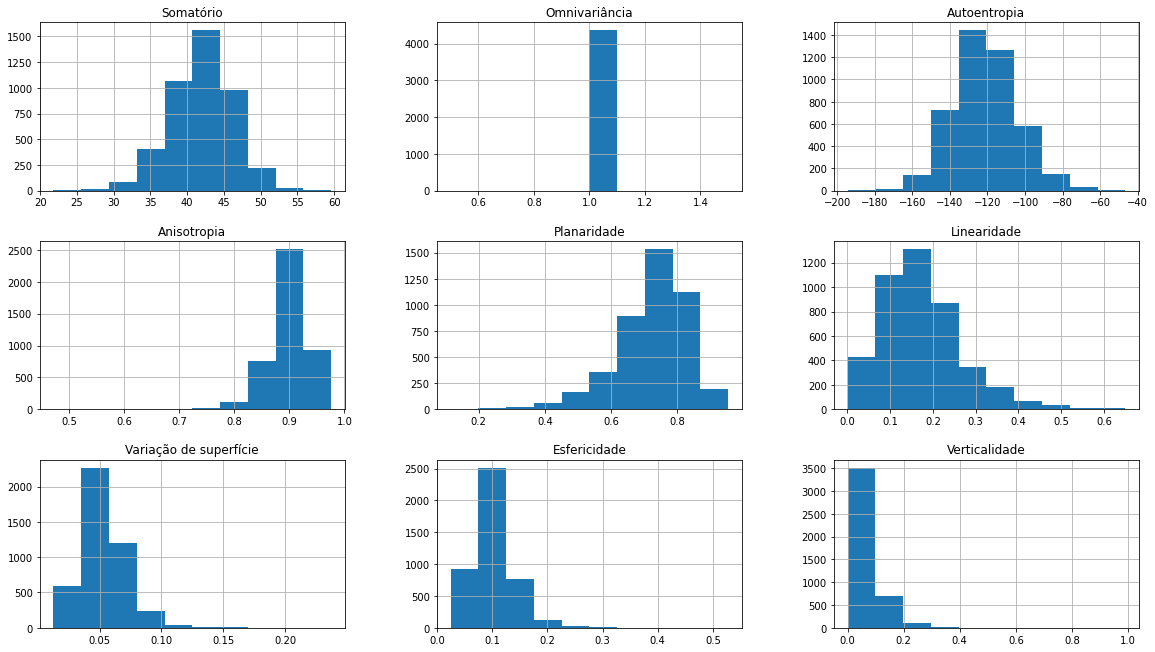

In [9]:
plot_histograms(df_re)

In [10]:
# gfIndex: valor entre 0-8
# 0 significa Somatório
# 8 significa Verticalidade
def plot_histogram_together(df, gfIndex=0):
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    labels = ['Raio 10', 'Raio 11', 'Raio 12', 'Raio 13', 'Raio 14']
    
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    arr = []
    for col in colsNames[gfIndex]:
        arr.append(df[col])

    plt.hist(arr, bins=10, label=labels)
    plt.title('Histograma: ' + features[gfIndex])
    plt.legend(loc='upper right')

    plt.show()

In [11]:
def plot_histograms_together(df, gf=None):
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    labels = ['Raio 10', 'Raio 11', 'Raio 12', 'Raio 13', 'Raio 14']
    
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    i, j = 0, 0 # refactor
    for index, col in enumerate(colsNames):
        arr = []
        for c in col:
            arr.append(df[c])
        
        axes[i, j].hist(arr, bins=10, label=labels)
        axes[i, j].set_title(features[index])
        axes[i, j].legend(loc='upper right')
        j += 1
        if j == 3:
            i += 1
            j = 0

    plt.show()

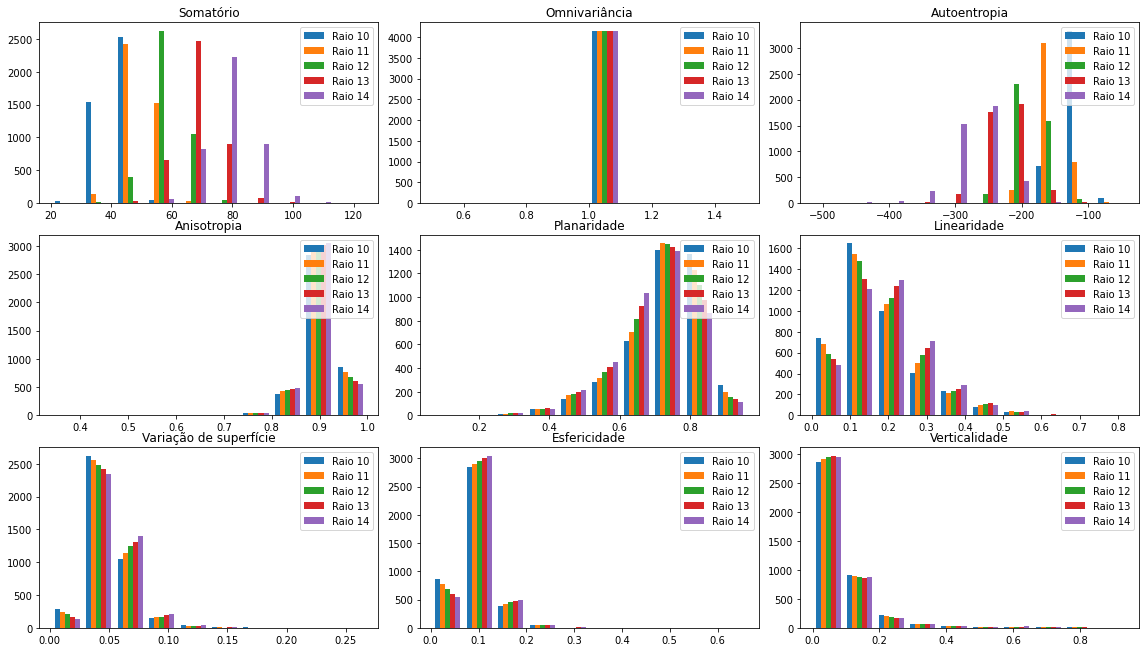

In [12]:
plot_histograms_together(df_le)

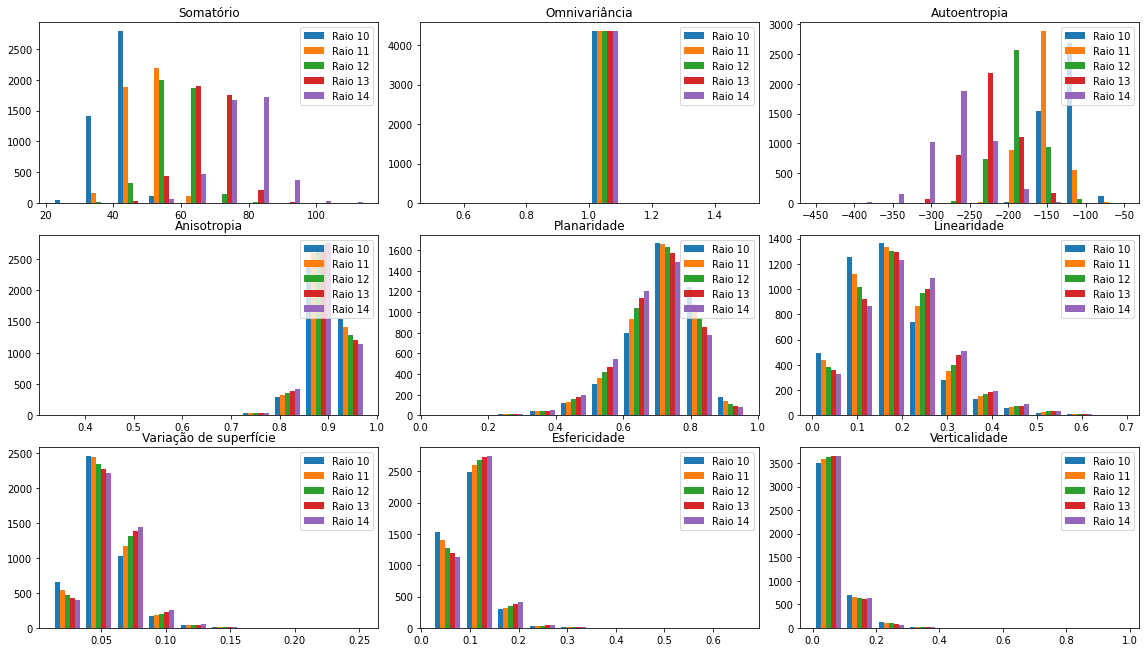

In [13]:
plot_histograms_together(df_re)

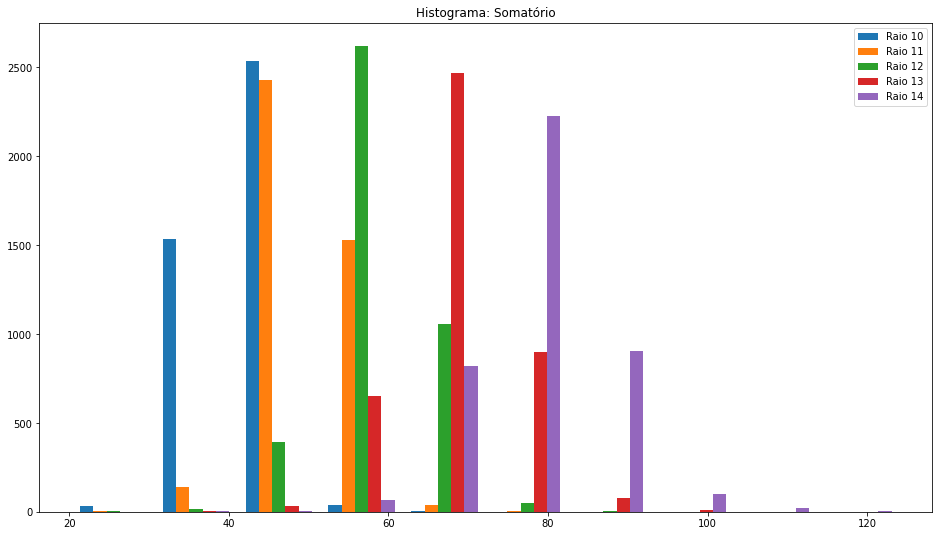

In [14]:
plot_histogram_together(df_le, gfIndex=0)

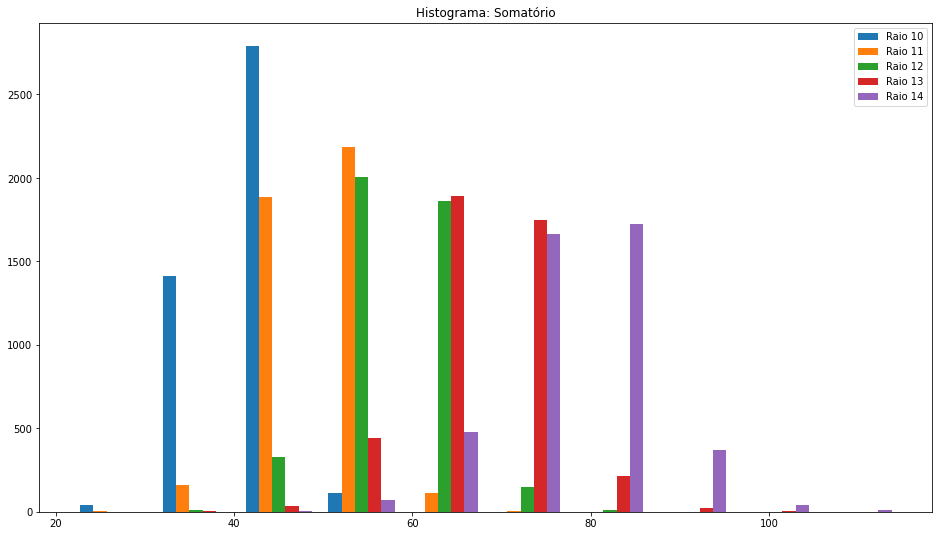

In [15]:
plot_histogram_together(df_re, gfIndex=0)

In [16]:
# helper datasets

# left eye
dfr10_le = df_le.iloc[:,1:10]
dfr10_le .columns = features
dfr11_le  = df_le.iloc[:,10:19]
dfr11_le .columns = features
dfr12_le  = df_le.iloc[:,19:28]
dfr12_le .columns = features
dfr13_le  = df_le.iloc[:,28:37]
dfr13_le .columns = features
dfr14_le  = df_le.iloc[:,37:46]
dfr14_le .columns = features

# right eye
dfr10_re = df_re.iloc[:,1:10]
dfr10_re .columns = features
dfr11_re  = df_re.iloc[:,10:19]
dfr11_re .columns = features
dfr12_re  = df_re.iloc[:,19:28]
dfr12_re .columns = features
dfr13_re  = df_re.iloc[:,28:37]
dfr13_re .columns = features
dfr14_re  = df_re.iloc[:,37:46]
dfr14_re .columns = features

In [17]:
def plot_scatterplot(df, column, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(df.columns):
        df.plot.scatter(ax=axes[i, j], x=column, y=col)
        j += 1
        if j == 3:
            i += 1
            j = 0

    plt.show()

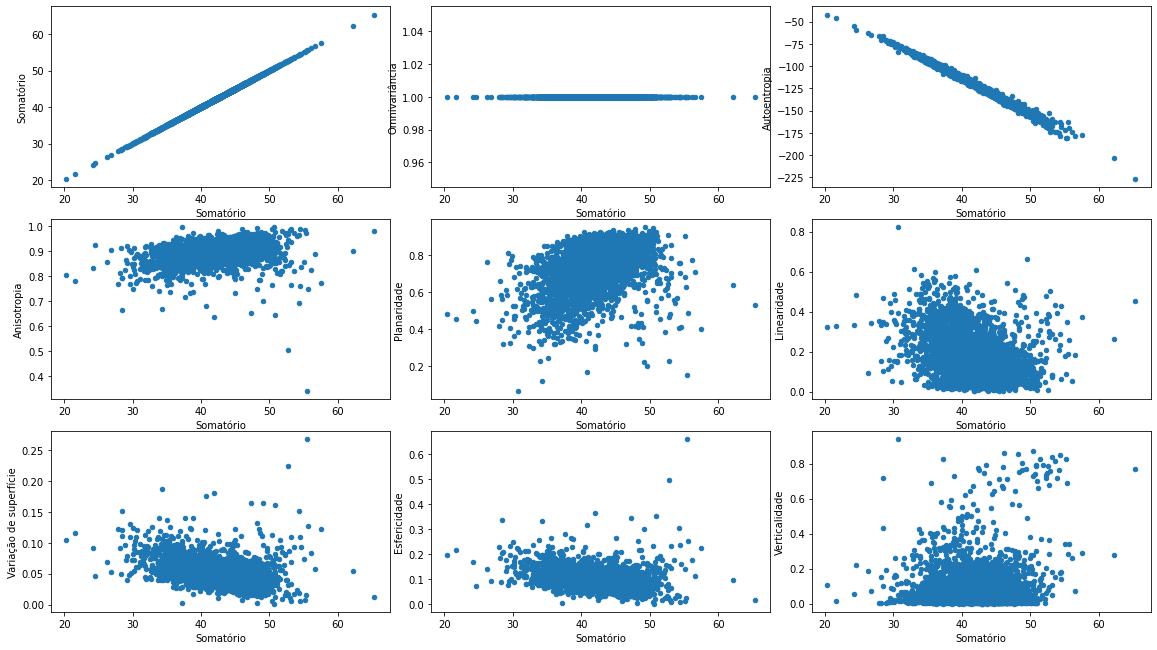

In [18]:
plot_scatterplot(dfr10_le, 'Somatório')

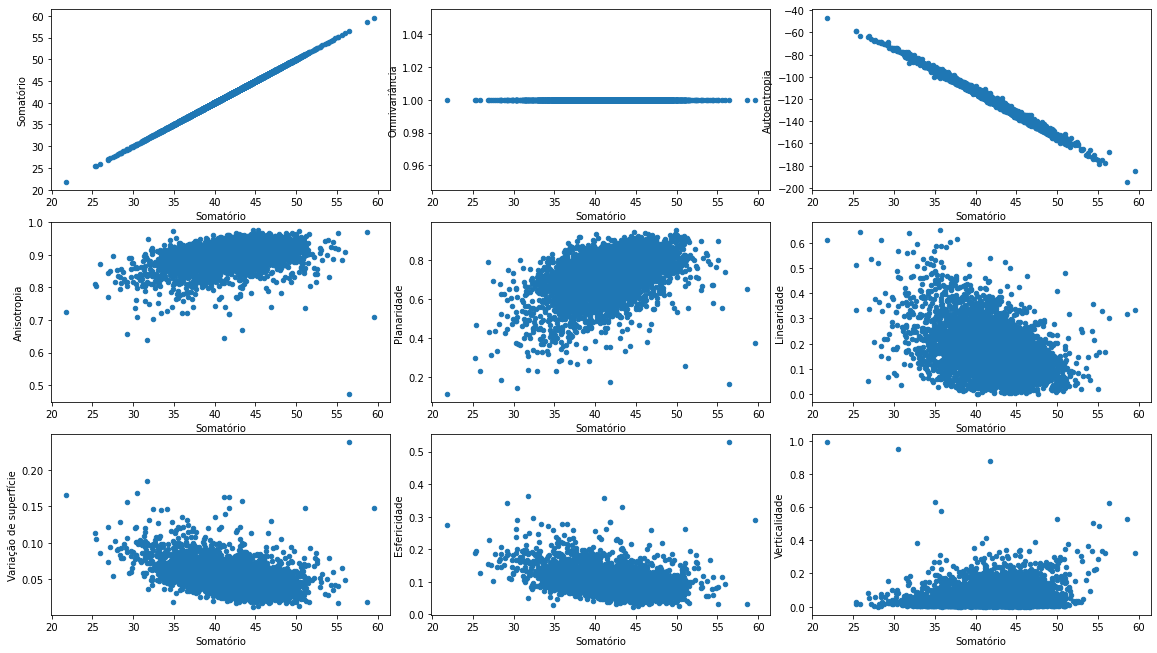

In [19]:
plot_scatterplot(dfr10_re, 'Somatório')